longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


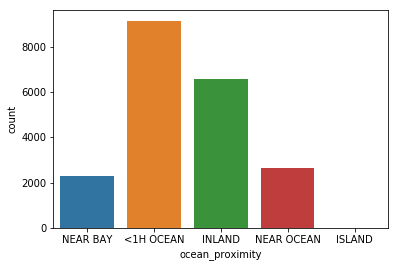

In [55]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data=pd.read_csv("Housing.csv")
y=data.median_house_value
print(data.isnull().sum())
data.total_bedrooms=data.fillna(data.total_bedrooms.mean())
print(data.isnull().sum())
#print(data["ocean_proximity"].value_counts())
#print(data.dtypes)
#data["total_bedrooms"].value_counts())
snb.countplot(data.ocean_proximity)


In [56]:
new_val=pd.get_dummies(data.ocean_proximity)

In [57]:
data[new_val.columns]=new_val

In [58]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null object
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
<1H OCEAN             20640 non-null uint8
INLAND                20640 non-null uint8
ISLAND                20640 non-null uint8
NEAR BAY              20640 non-null uint8
NEAR OCEAN            20640 non-null uint8
dtypes: float64(8), object(2), uint8(5)
memory usage: 1.7+ MB


In [60]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
population,0.099773,-0.108785,-0.296244,0.857126,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.020732,-0.039402,-0.237496,-0.484859,-0.607669,1.000000,-0.010614,-0.240887,-0.262163


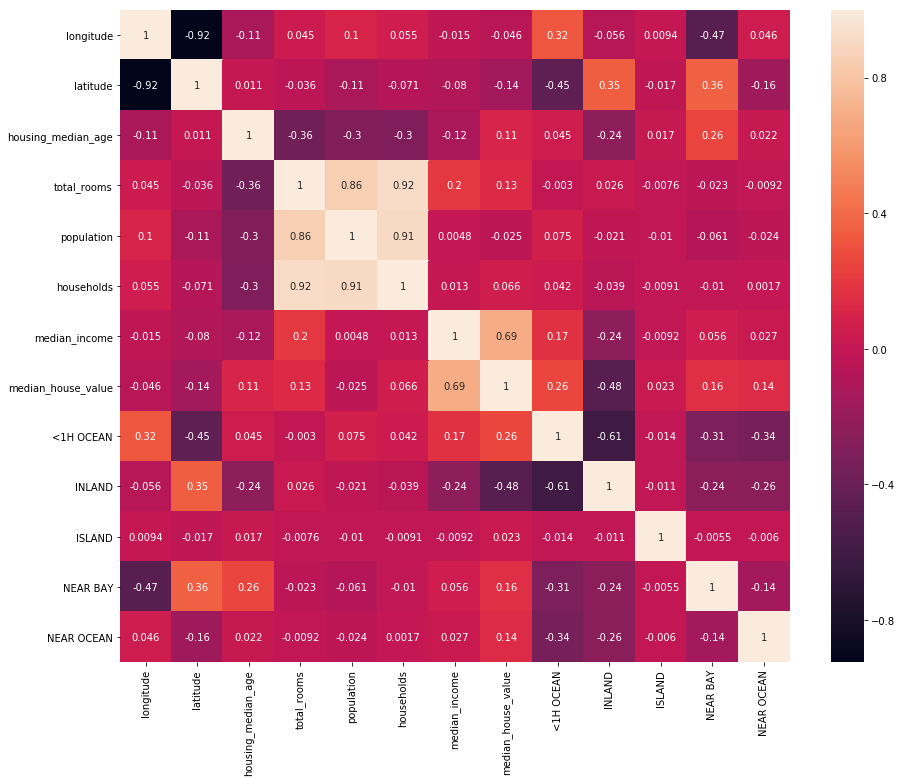

In [61]:
plt.figure(figsize=(15,12))
snb.heatmap(data.corr(),annot=True)

In [62]:
data.corr().sort_values(ascending=False,by='median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001625166FC50>,
      dtype=object)

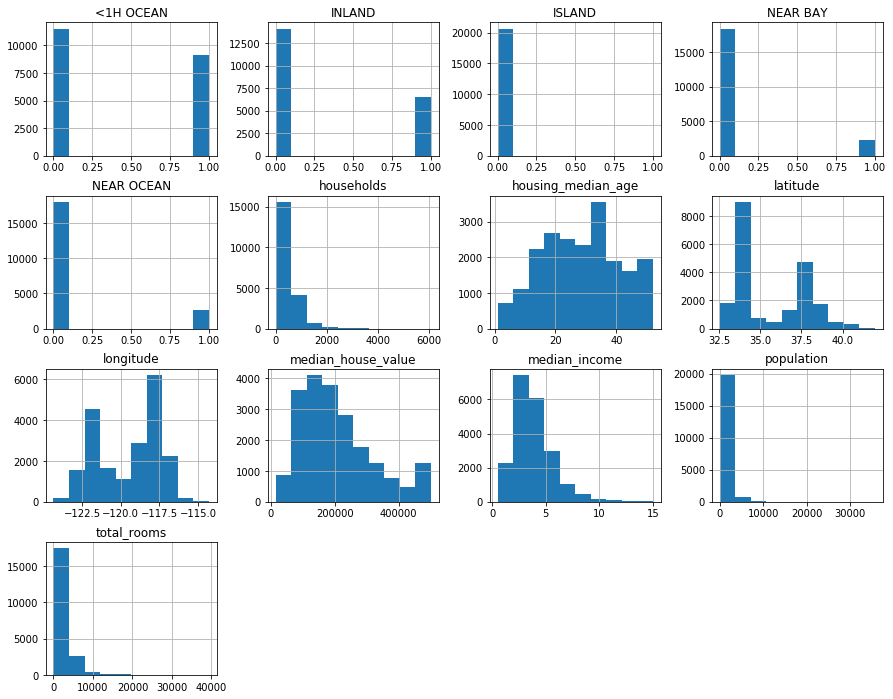

In [63]:
data.hist(figsize=(15,12))

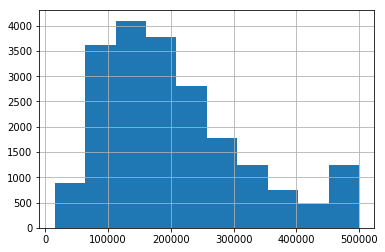

In [64]:
data.median_house_value.hist()

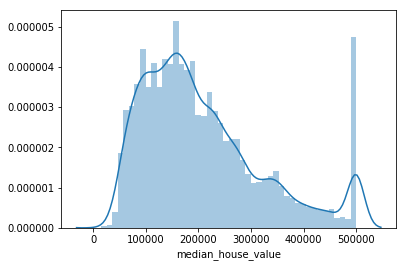

In [65]:
snb.distplot(data.median_house_value)

In [66]:
from sklearn import preprocessing
convert=preprocessing.StandardScaler()

In [67]:
feature=data.drop(['median_house_value'],axis=1)
feature1=feature.drop(['ocean_proximity'],axis=1)
featureT=convert.fit_transform(feature1.values)
label=data.median_house_value
labelT=convert.fit_transform(data.median_house_value.values.reshape(-1,1)).flatten()


C:\Users\kk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
print(featureT)

[[-1.32783522  1.05254828  0.98214266 ... -0.01556621  2.83074203
  -0.38446649]
 [-1.32284391  1.04318455 -0.60701891 ... -0.01556621  2.83074203
  -0.38446649]
 [-1.33282653  1.03850269  1.85618152 ... -0.01556621  2.83074203
  -0.38446649]
 ...
 [-0.8237132   1.77823747 -0.92485123 ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.87362627  1.77823747 -0.84539315 ... -0.01556621 -0.35326426
  -0.38446649]
 [-0.83369581  1.75014627 -1.00430931 ... -0.01556621 -0.35326426
  -0.38446649]]


In [69]:
print(labelT)

[ 2.12963148  1.31415614  1.25869341 ... -0.99274649 -1.05860847
 -1.01787803]


In [70]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,label_train,label_test=train_test_split(featureT,labelT,test_size=0.2,random_state=19)

In [71]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
linear_reg=linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)
r2_score(linear_reg.predict(feature_train),label_train)

0.45172116215411284

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_reg,feature_train,label_train,cv=10)


array([0.68015467, 0.62027427, 0.6319185 , 0.63940566, 0.62764545,
       0.63626753, 0.63406217, 0.65641435, 0.65847483, 0.65907536])

In [73]:
mse_linear=mean_squared_error(linear_reg.predict(feature_test),label_test)
reg_score=r2_score(linear_reg.predict(feature_test),label_test)
reg_score

0.4370921830830592

In [74]:
linear_reg.coef_

array([-0.22085223, -0.45669888,  0.10997401,  0.00066903, -0.22085223,
       -0.47216544,  0.50332935,  0.61219249,  0.05532376, -0.11429999,
        0.02590417,  0.02806512,  0.04927685])

In [75]:
pd.DataFrame(linear_reg.coef_,index=feature1.columns,columns=['coefficient']).sort_values(ascending=False,by='coefficient')

,coefficient
median_income,0.612192
households,0.503329
housing_median_age,0.109974
<1H OCEAN,0.055324
NEAR OCEAN,0.049277
NEAR BAY,0.028065
ISLAND,0.025904
total_rooms,0.000669
INLAND,-0.114300
longitude,-0.220852


In [76]:
ridge_reg=linear_model.Ridge(alpha=0.01,random_state=19)
ridge_reg.fit(feature_train,label_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=19, solver='auto', tol=0.001)

In [77]:
mse_ridge=mean_squared_error(ridge_reg.predict(feature_test),label_test)
ridge_score=r2_score(ridge_reg.predict(feature_test),label_test)

In [78]:
ridge_score

0.43709102920210974

In [79]:
ridge_reg.coef_

array([-0.22084891, -0.45669169,  0.10997406,  0.00067083, -0.22084891,
       -0.47216174,  0.50332412,  0.61219193,  0.05532434, -0.11430164,
        0.0259042 ,  0.02806579,  0.04927765])

In [80]:
pd.DataFrame(ridge_reg.coef_,index=feature1.columns,columns=['coefficient']).sort_values(ascending=False,by='coefficient')

,coefficient
median_income,0.612192
households,0.503324
housing_median_age,0.109974
<1H OCEAN,0.055324
NEAR OCEAN,0.049278
NEAR BAY,0.028066
ISLAND,0.025904
total_rooms,0.000671
INLAND,-0.114302
longitude,-0.220849


In [81]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(feature_train,label_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [82]:
r2_score(tree_reg.predict(feature_train),label_train)

0.9999999999999535

In [83]:
mse_tree=mean_squared_error(tree_reg.predict(feature_test),label_test)
tree_score=r2_score(tree_reg.predict(feature_test),label_test)

In [84]:
tree_score

0.6453773584045441

In [85]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()

In [86]:
forest_reg.fit(feature_train,label_train)

C:\Users\kk\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [87]:
r2_score(forest_reg.predict(feature_train),label_train)

0.9604738154335883

In [88]:
cross_val_score(forest_reg,feature_train,label_train,cv=10)

array([0.81551576, 0.79521398, 0.76992396, 0.78452667, 0.81421771,
       0.78292646, 0.79239628, 0.80547075, 0.78906045, 0.81661734])

In [89]:
mse_forest=mean_squared_error(forest_reg.predict(feature_test),label_test)
forest_score=r2_score(forest_reg.predict(feature_test),label_test)

In [90]:
forest_score

0.7479172902090268

In [91]:
data=[reg_score,ridge_score,tree_score,forest_score]
index=['Linear Regression','Ridge Regression','Decision tree Regression','Random Forest Regression']
pd.DataFrame(data,index=index,columns=['Scores']).sort_values(ascending=False,by=['Scores'])

,Scores
Random Forest Regression,0.747917
Decision tree Regression,0.645377
Linear Regression,0.437092
Ridge Regression,0.437091


In [94]:
data=[mse_linear,mse_ridge,mse_tree,mse_forest]
index=['Linear Regression','Ridge Regression','Decision tree Regression','Random Forest Regression']
pd.DataFrame(data,index=index,columns=['Mean_Square_error']).sort_values(ascending=True,by=['Mean_Square_error'])

,Mean_Square_error
Random Forest Regression,0.200379
Decision tree Regression,0.347624
Ridge Regression,0.370324
Linear Regression,0.370324
